In [2]:
# 2. Disease prediction (bonus)

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# read the data
df_heart=pd.read_csv('Data3/cardio_train.csv', delimiter=';', index_col=0)

In [5]:
# df_heart
# df_heart.info()
df_heart

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


Utforska om det finns några konstigheter i datan

In [6]:
# df_heart['active'].describe() # Ok
# df_heart['alco'].describe() # ok
# df_heart['cardio'].describe() # ok
# df_heart['cholesterol'].describe() # 0k
# df_heart['age'].describe() # ok
# df_heart['gender']. value_counts() # Ok
# df_heart['gluc'].value_counts() # Ok
# df_heart['smoke'].value_counts() # Ok


# df_heart['ap_hi'].describe() # - investigate, min value
# df_heart['ap_lo'].describe() # - investigate, min value
# df_heart['height'].describe() # - investigate, min value 55?
# df_heart['weight'].describe() # - investigate, min 10, max 200?

# 2.0 - EDA uppvärmning

## a) Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?

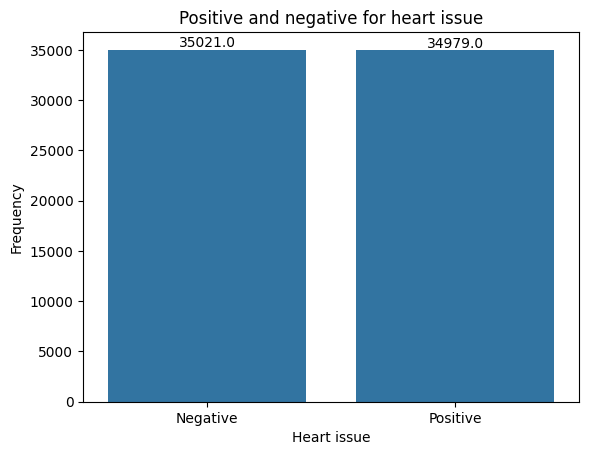

In [23]:

df_heart['Cardio'] = df_heart['cardio'].replace({0: 'Negative', 1: 'Positive'})
ax=sns.countplot(x='Cardio', data=df_heart)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()-700), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Add labels and title
plt.xlabel('Heart issue')
plt.ylabel('Frequency')
plt.title('Positive and negative for heart issue')

plt.show()

b) Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.

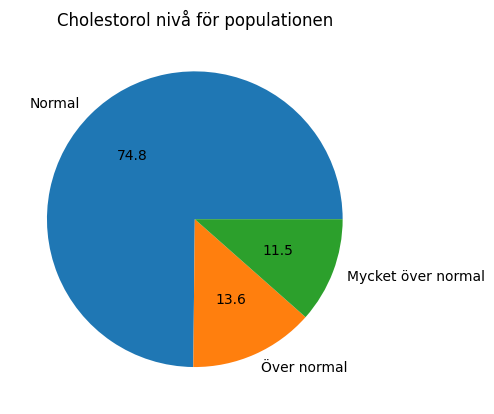

In [9]:
df_heart['Chol']=df_heart['cholesterol'].replace({1:'Normal', 2:'Över normal', 3:'Mycket över normal'})

# fixa tårt diagram

#sns.countplot(x='Chol', data=df_heart)

pal_col= sns.color_palette('dark')

df_heart['Chol'].value_counts().plot(kind='pie',autopct='%.1f')


plt.title('Cholestorol nivå för populationen')
plt.xlabel('')
plt.ylabel('')

plt.show()


c) Hur ser åldersfördelningen ut? Rita ett histogram.

<Axes: xlabel='age', ylabel='Count'>

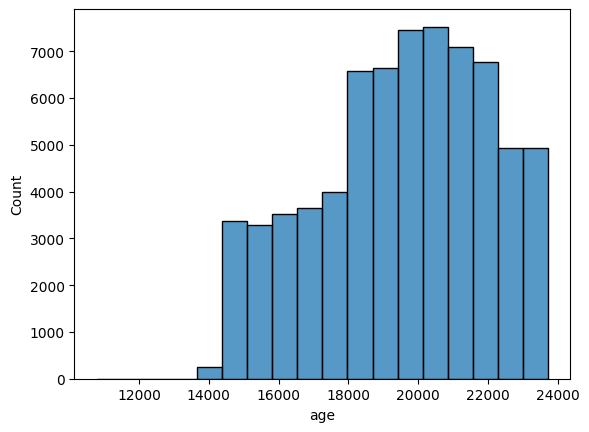

In [25]:
sns.histplot(df_heart['age'], binwidth= 700,)

d) Hur stor andel röker?


In [12]:
df_heart['smoke'].value_counts()

smoke
0    63831
1     6169
Name: count, dtype: int64

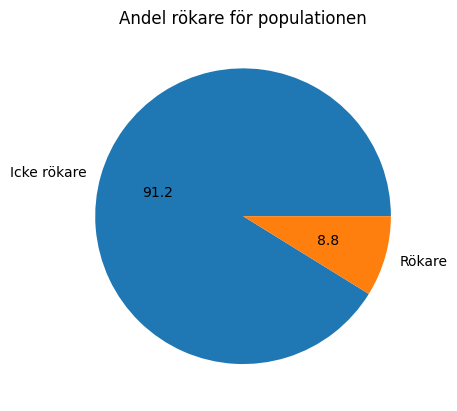

In [13]:
df_heart['Smoke']=df_heart['smoke'].replace({0:'Icke rökare', 1:'Rökare'})

pal_col= sns.color_palette('dark')

df_heart['Smoke'].value_counts().plot(kind='pie',autopct='%.1f')

plt.title('Andel rökare för populationen')
plt.xlabel('')
plt.ylabel('')

plt.show()

e) Hur ser viktfördelningen ut? Rita lämpligt diagram.


In [28]:
df_heart['weight'].describe()

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

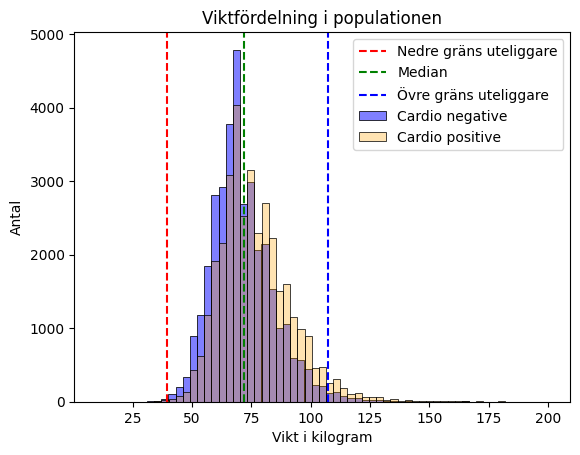

In [47]:
# Fixa så att vi får vikterna för resp kategori

cardio_negatives = df_heart[df_heart['cardio'] == 0]['weight']
cardio_positives = df_heart[df_heart['cardio'] == 1]['weight']

# Skapa histogram för positiva och negativa
sns.histplot(data=cardio_negatives, color='blue', alpha=0.5, label='Cardio negative', binwidth=3)
sns.histplot(data=cardio_positives, color='orange', alpha=0.3, label='Cardio positive', binwidth=3)

plt.title('Viktfördelning i populationen')

q1 = np.percentile(df_heart['weight'], 25)
q2 = np.percentile(df_heart['weight'], 50)
q3 = np.percentile(df_heart['weight'], 75)

# Beräkna uteliggare (nedre och övdre gräns)

low_out=q1-(q3-q1)*1.5
high_out=q3+(q3-q1)*1.5

# Lägg till horizontella linjer för uteliggare och median
plt.axvline(low_out, color='r', linestyle='--', label='Nedre gräns uteliggare')
plt.axvline(q2, color='g', linestyle='--', label='Median')
plt.axvline(high_out, color='b', linestyle='--', label='Övre gräns uteliggare')

# Lägg till fig. legend
plt.legend()

plt.ylabel('Antal')
plt.xlabel('Vikt i kilogram')
#plt.ylim(10, 250)

plt.show()

f) Hur ser längdfördelningen ut? Rita lämpligt diagram.


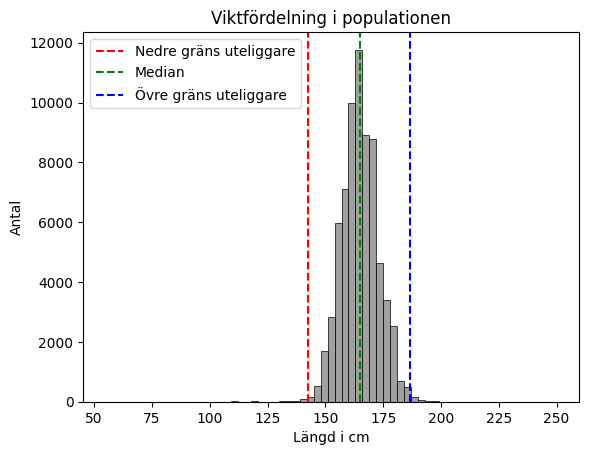

In [52]:

sns.histplot(data=df_heart['height'], color='grey', binwidth=3)

plt.title('Viktfördelning i populationen')

q1 = np.percentile(df_heart['height'], 25)
q2 = np.percentile(df_heart['height'], 50)
q3 = np.percentile(df_heart['height'], 75)

# Beräkna uteliggare (nedre och övdre gräns)

low_out=q1-(q3-q1)*1.5
high_out=q3+(q3-q1)*1.5

# Lägg till horizontella linjer för uteliggare och median
plt.axvline(low_out, color='r', linestyle='--', label='Nedre gräns uteliggare')
plt.axvline(q2, color='g', linestyle='--', label='Median')
plt.axvline(high_out, color='b', linestyle='--', label='Övre gräns uteliggare')

# Lägg till fig. legend
plt.legend()

plt.ylabel('Antal')
plt.xlabel('Längd i cm')
#plt.ylim(10, 250)

plt.show()

g) Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom? Rita lämpligt diagram

In [59]:
# gender 1 - women, 2 - men

women=df_heart[df_heart['gender']==1]['gender'].count()
men=df_heart[df_heart['gender']==2]['gender'].count()

45530

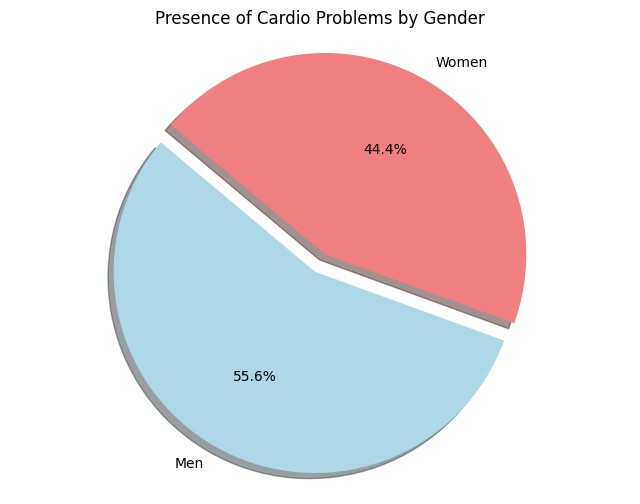

In [60]:



men_cardio_count = 100
women_cardio_count = 80

# Data to plot
labels = ['Men', 'Women']
sizes = [men_cardio_count, women_cardio_count]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice (Men)

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Presence of Cardio Problems by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()